In [14]:
from dotenv import load_dotenv
from langchain_community.vectorstores import FAISS
from langchain_community.document_loaders import PyPDFLoader
from langchain_openai import OpenAIEmbeddings
import numpy as np
import time
from Utils.embedding import plot_results
import statistics
import matplotlib.pyplot as plt

load_dotenv()

True

Messung für "text-embedding-3-large" durchläufen mit 10 Fragen

In [11]:
embeddings = OpenAIEmbeddings(model="text-embedding-3-large", chunk_size=1)
times_large = []
for i in range(10):
    t1 = time.time()
    results = []
    loader = PyPDFLoader(
        "pdfs\MIG_VDA4938T2_eingehend_v.2.6_DE.pdf",
        extract_images=False,
    )
    pages = loader.load_and_split()
    faiss_index = FAISS.from_documents(pages, embeddings)
    times_large.append(t1 - time.time())

print(f"Das erzeugen der Embeddings hat {times_large} Sekunden gedauert.")
print(
    f"Das erzeugen der Embeddings hat im Druchschnitt {statistics.mean(times_large)} Sekunden gedauert."
)

<>:19: SyntaxWarning: invalid escape sequence '\M'
<>:19: SyntaxWarning: invalid escape sequence '\M'
C:\Users\sebas\AppData\Local\Temp\ipykernel_22472\753148376.py:19: SyntaxWarning: invalid escape sequence '\M'
  "pdfs\MIG_VDA4938T2_eingehend_v.2.6_DE.pdf",


Das erzeugen der Embeddings hat [-80.95747494697571, -86.96031737327576, -85.00509667396545, -82.59673976898193, -80.69695973396301, -83.69589924812317, -85.36845374107361, -81.06105899810791, -82.25933241844177, -82.56044030189514] Sekunden gedauert.
Das erzeugen der Embeddings hat im Druchschnitt -83.11617732048035 Sekunden gedauert.


Messung für "text-embedding-3-small" durchläufen mit 10 Fragen

In [12]:
embeddings = OpenAIEmbeddings(model="text-embedding-3-small", chunk_size=1)
times_small = []
for i in range(10):
    t1 = time.time()

    results = []
    loader = PyPDFLoader(
        "pdfs\MIG_VDA4938T2_eingehend_v.2.6_DE.pdf",
        extract_images=False,
    )
    pages = loader.load_and_split()
    faiss_index = FAISS.from_documents(pages, embeddings)
    times_small.append(t1 - time.time())

print(f"Das erzeugen der Embeddings hat {times_small} Sekunden gedauert.")
print(
    f"Das erzeugen der Embeddings hat im Druchschnitt {statistics.mean(times_small)} Sekunden gedauert."
)

<>:19: SyntaxWarning: invalid escape sequence '\M'
<>:19: SyntaxWarning: invalid escape sequence '\M'
C:\Users\sebas\AppData\Local\Temp\ipykernel_22472\3287514782.py:19: SyntaxWarning: invalid escape sequence '\M'
  "pdfs\MIG_VDA4938T2_eingehend_v.2.6_DE.pdf",


Das erzeugen der Embeddings hat [-62.507397413253784, -61.94740843772888, -61.463119983673096, -62.35727334022522, -60.518155097961426, -60.2301709651947, -62.72052621841431, -62.99577784538269, -61.90232038497925, -60.79731106758118] Sekunden gedauert.
Das erzeugen der Embeddings hat im Druchschnitt -61.74394607543945 Sekunden gedauert.


Messung für "text-embedding-ada-002" durchläufen mit 10 Fragen

In [13]:
embeddings = OpenAIEmbeddings(model="text-embedding-ada-002", chunk_size=1)
times_ada = []
for i in range(10):
    t1 = time.time()
    results = []
    loader = PyPDFLoader(
        "pdfs\MIG_VDA4938T2_eingehend_v.2.6_DE.pdf",
        extract_images=False,
    )
    pages = loader.load_and_split()
    faiss_index = FAISS.from_documents(pages, embeddings)
    times_ada.append(t1 - time.time())

print(f"Das erzeugen der Embeddings hat {times_ada} Sekunden gedauert.")
print(
    f"Das erzeugen der Embeddings hat im Druchschnitt {statistics.mean(times_ada)} Sekunden gedauert."
)

<>:19: SyntaxWarning: invalid escape sequence '\M'
<>:19: SyntaxWarning: invalid escape sequence '\M'
C:\Users\sebas\AppData\Local\Temp\ipykernel_22472\1127298914.py:19: SyntaxWarning: invalid escape sequence '\M'
  "pdfs\MIG_VDA4938T2_eingehend_v.2.6_DE.pdf",


Das erzeugen der Embeddings hat [-58.42124366760254, -55.50486350059509, -56.813860177993774, -57.102248191833496, -59.1870858669281, -57.17426300048828, -60.3832528591156, -63.44187021255493, -59.24049425125122, -57.74188494682312] Sekunden gedauert.
Das erzeugen der Embeddings hat im Druchschnitt -58.50110666751861 Sekunden gedauert.


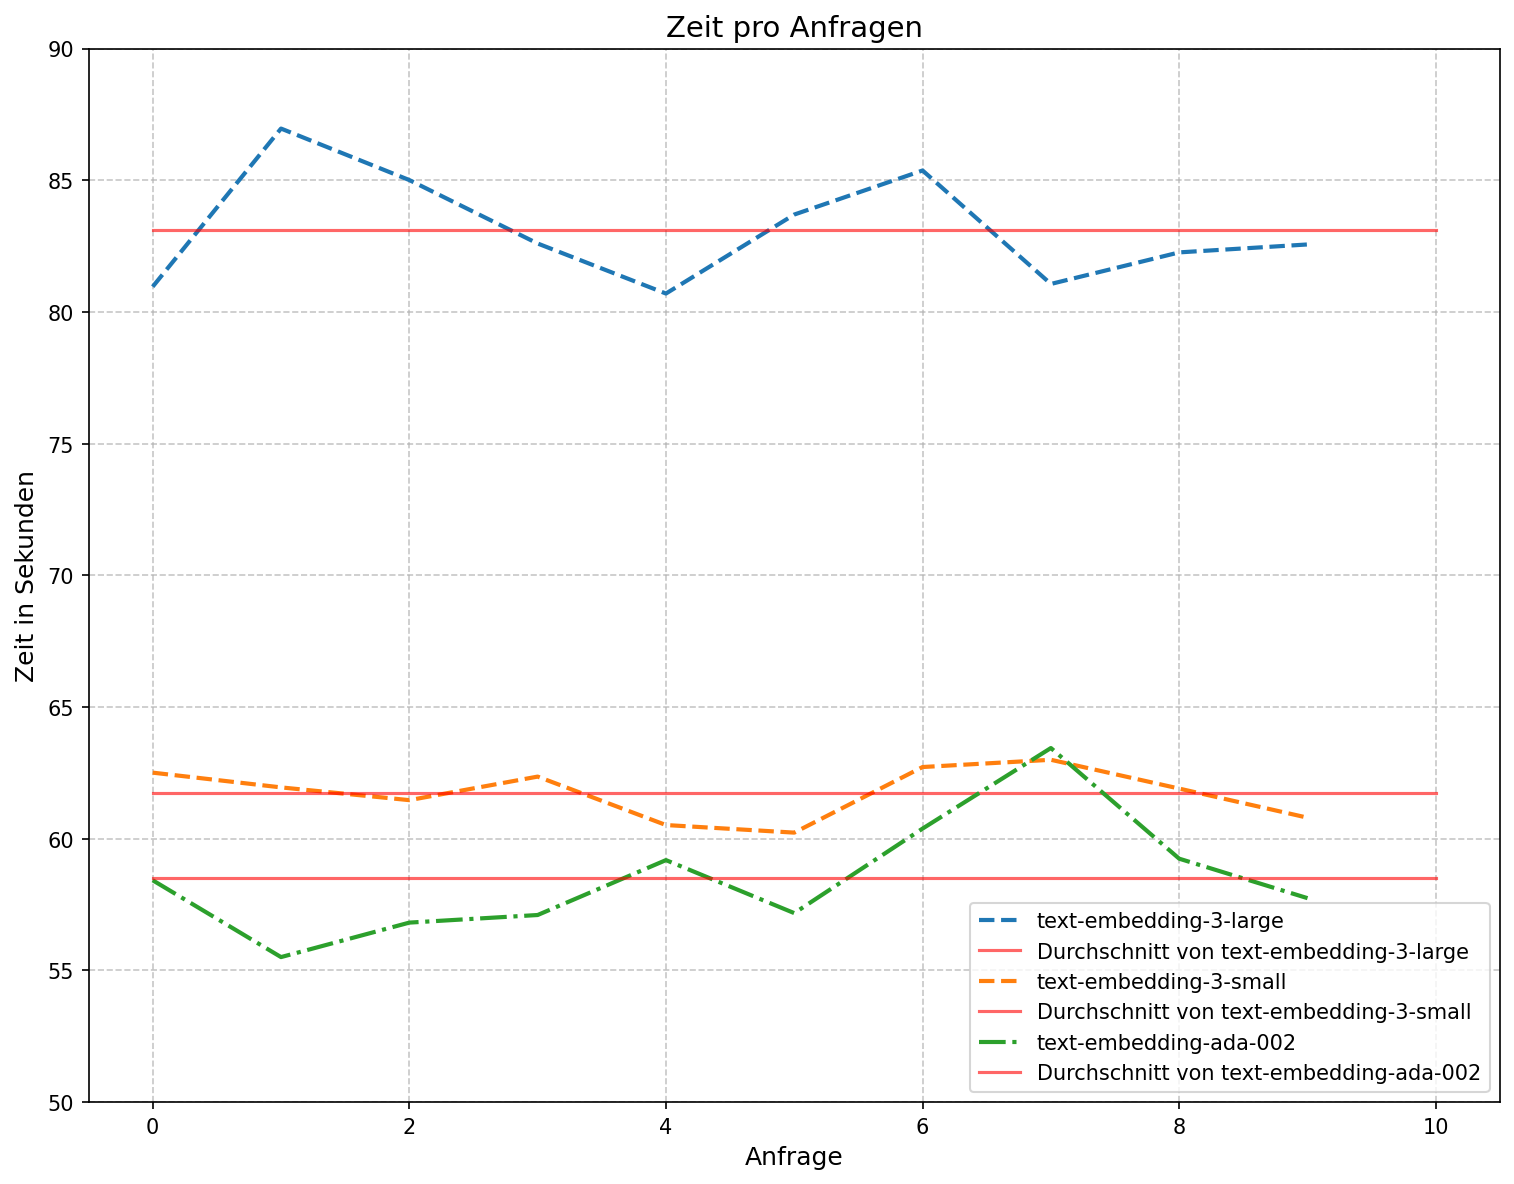

: 

In [38]:
colors = plt.cm.viridis(np.linspace(0, 1, 10))
line_styles = ["--", "--", "-.", ":", "-", "--", "-.", ":", "-", "--"]
labels = ["text-embedding-3-large", "text-embedding-3-small", "text-embedding-ada-002"]
times = [[abs(x) for x in times_large], [abs(x) for x in times_small], [abs(x) for x in times_ada]]

# Plotten der Daten
plt.figure(figsize=(12, 8), dpi=150)
for i in range(len(times)):
    plt.plot(
        times[i],
        label=labels[i],
        linestyle=line_styles[i],
        linewidth=2,
    )
    plt.plot(
        [0, 10],
        [statistics.mean(times[i]), statistics.mean(times[i])],
        label=f"Durchschnitt von " + labels[i],
        linestyle="-",
        color="red",
        linewidth=1.5,
        alpha=0.6,
    )
# plt.xlim(xlim)
plt.ylim((50,90))
plt.legend()
plt.xlabel("Anfrage", fontsize=12)
plt.ylabel("Zeit in Sekunden", fontsize=12)
plt.title(
    "Zeit pro Anfrage",
    fontsize=14,
)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()